<h1>O Auxílio Emergencial e algumas de suas relações</h1>
<p>Matheus Ramos Parracho</p>
<br></br>

<p>O coronavírus foi uma pandemia que deteriorou vários setores no país, e com a economia não foi diferente. Pensando nisso, o governo instaurou o auxílio emergencial.</p>

<p>A partir dos dados da Pesquisa Nacional por Amostra de Domicílios - PNAD COVID19,
realizado pelo IBGE(Instituto Brasileiro de Geografia e Estatística), iremos observar alguns dados estatísticos que relacionam
o recebimento ou não do auxílio emergencial proposto em virtude do coronavírus,
além da quantia recebida por alguns de seus grupos.</p>
<p>Ademais, iremos treinar um modelo para identificar, dadas algumas características
de um cidadão em virtude da doença e trabalho, se este recebeu ou não o auxílio emergencial.
    </p>
<br></br>
Este relatório acompanhará, além dos resultados, as fontes e códigos provenintes.</p>

In [3]:
## Importando bibliotecas necessarias

import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.neighbors     import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier

import numpy as np

#pd.set_option("max_rows", None)
pd.set_option('max_columns', None)

In [27]:
#Importando os dados
#meu pip nao estava querendo instalar o lib do basededados
dados = pd.read_csv("PNAD_COVID_112020.csv")

#Convertendo valores NaN para 0 (nao altera os resultados, ja que a pesquisa inclui 
#somente valores distintos de 0.)
dados = dados.replace(np.nan, 0)

dados.head()

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,V1023,V1030,V1031,V1032,posest,A001,A001A,A001B1,A001B2,A001B3,A002,A003,A004,A005,A006,A006A,A006B,A007,A007A,A008,A009,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B002,B0031,B0032,B0033,B0034,B0035,B0036,B0037,B0041,B0042,B0043,B0044,B0045,B0046,B005,B006,B007,B008,B009A,B009B,B009C,B009D,B009E,B009F,B0101,B0102,B0103,B0104,B0105,B0106,B011,C001,C002,C003,C004,C005,C0051,C0052,C0053,C006,C007,C007A,C007B,C007C,C007D,C007E,C007E1,C007E2,C007F,C008,C009,C009A,C010,C0101,C01011,C01012,C0102,C01021,C01022,C0103,C0104,C011A,C011A1,C011A11,C011A12,C011A2,C011A21,C011A22,C012,C013,C014,C015,C016,C017A,D0011,D0013,D0021,D0023,D0031,D0033,D0041,D0043,D0051,D0053,D0061,D0063,D0071,D0073,E001,E0021,E0022,E0023,E0024,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006
0,2020,11,11.0,0.0,1,4,11,7,1110011,110015970,1,1,152902,101.011703,117.463719,1114,1,1,5,8,1984,36,1,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,35.0,6.0,0.0,0.0,0.0,0.0,48.0,48.0,0.0,1.0,1.0,4.0,1045.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,1045.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0,2,0.0,2,0.0,2,0.0,1,600.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1,2,1,1,1.0
1,2020,11,11.0,0.0,1,4,11,7,1110011,110015970,1,1,150835,101.011703,125.751202,1124,2,2,18,8,1990,30,2,4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,27.0,20.0,0.0,0.0,0.0,0.0,36.0,36.0,2.0,1.0,1.0,4.0,1045.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,1045.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2,0.0,2,0.0,2,0.0,2,0.0,1,600.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1,2,1,1,1.0
2,2020,11,11.0,0.0,1,4,11,7,1110011,110015970,1,1,144737,101.011703,131.361018,1112,3,4,25,12,2006,13,1,4,2,1.0,1.0,3.0,1.0,0.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,2,0.0,2,0.0,2,0.0,1,600.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1,2,1,1,1.0
3,2020,11,11.0,0.0,1,4,11,7,1110011,110015970,1,1,144737,101.011703,131.361018,1112,4,4,24,8,2009,11,1,4,2,1.0,1.0,3.0,1.0,0.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,2,0.0,2,0.0,2,0.0,1,600.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1,2,1,1,1.0
4,2020,11,11.0,0.0,2,1,11,7,1110011,110015970,1,1,92377,101.011703,100.733517,1126,1,1,18,5,1963,57,2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2,0.0,2,0.0,2,0.0,1,1045.0,2,0.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1,2,1,1,1.0


In [3]:
# O significado de cada coluna e o valor atrelado a ela está indicado em uma tabela 
# chamada "dicionario", fornecida pelo IBGE 
dados.shape

(381438, 148)

In [4]:
## ALGUMAS VISUALIZACOES

In [40]:
# funcao indicando as relacoes entre dois fatores
def relacoes(a,b):
    dic = {}
    for i in range(len(dados[a])):
        if dic.get(dados[a][i]) == None: 
            dic[dados[a][i]] = dados[b][i]
        else:
            dic[dados[a][i]] += dados[b][i]
    return dic

In [41]:
#dicionario com as relacoes dadas pelo IBGE
num_ufs = {11:"Rondonia",12:"Acre",13:"Amazonas",14:"Roraima",15:"Pará",
16:"Amapá",17:"Tocantins",21:"Maranhão",22:"Piauí",23:"Ceará",24:"Rio Grande do Norte",
25:"Paraíba",26:"Pernambuco",27:"Alagoas",28:"Sergipe",29:"Bahia",31:"Minas Gerais",
32:"Espírito Santo",33:"Rio de Janeiro",35:"São Paulo",41:"Paraná",42:"Santa Catarina",43:"Rio Grande do Sul",
50:"Mato Grosso do Sul",51:"Mato Grosso",52:"Goiás",53:"Distrito Federal"}

regioes = relacoes("UF","D0053")
print(regioes)
total = sum(list(regioes.values()))

{11: 2272055.0, 12: 2787102.0, 13: 3719211.0, 14: 1716976.0, 15: 4396819.0, 16: 1272800.0, 17: 1698333.0, 21: 7024184.0, 22: 2794311.0, 23: 5156902.0, 24: 2303677.0, 25: 2918844.0, 26: 5277357.0, 27: 5404953.0, 28: 2463863.0, 29: 5324888.0, 31: 8331207.0, 32: 4686320.0, 33: 7359398.0, 35: 7442379.0, 41: 4254535.0, 42: 4077232.0, 43: 4094736.0, 50: 1841915.0, 51: 2554089.0, 52: 3537699.0, 53: 1490823.0}


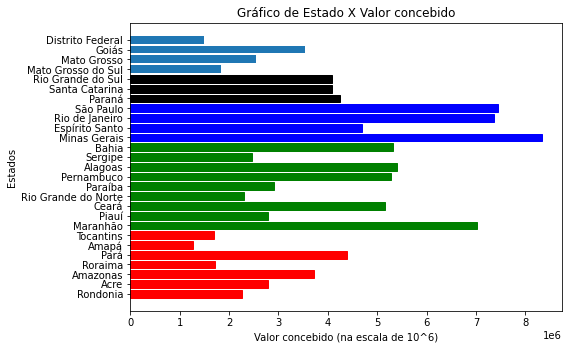

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
estados = list(num_ufs.values())
valores = list(regioes.values())

bar = ax.barh(estados,valores)

for i in range(len(bar)):
    if i < 7:
        bar[i].set_color('r')
    elif i < 16:
        bar[i].set_color('g')
    elif i < 20:
        bar[i].set_color('b')
    elif i < 23:
        bar[i].set_color('black')

ax.set_title('Gráfico de Estado X Valor concebido')
ax.set_xlabel('Valor concebido (na escala de 10^6)')
ax.set_ylabel('Estados')

plt.show()

<p>As cores representam as regiões em que os estados se encontram no Brasil, onde:
    <br>Azul claro: Centro-Oeste
    <br>Preto: Sul
    <br>Azul escuro: Sudeste
    <br>Verde: Nordeste
    <br>Vermelho: Norte</p>

In [55]:
minas = 100 * regioes[31] / total
print("%0.4f"%minas+"%")

7.8446%


<p>Nos pesquisados, 
observamos que o estado que recebeu maior 
valor em auxilio é Minas Gerais, com cerca de 7,8% do total dos 
valores repassados aos estados</p>

In [6]:
etnia = relacoes("A004","D0053")
print(etnia)

{4: 60024177.0, 1: 35622647.0, 2: 9456003.0, 3: 529539.0, 5: 545802.0, 9: 24440.0}


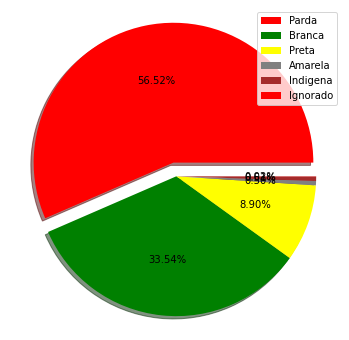

In [12]:
#%matplotlib notebook


labels = ["Parda","Branca","Preta","Amarela","Indigena","Ignorado"]
titulos = list(etnia.values())
cores = ['red', 'green', 'yellow', 'grey',"brown"]
explode = (0.1, 0, 0, 0, 0, 0)  # somente explode primeiro pedaco
total = sum(titulos)
plt.pie(titulos, explode=explode, colors=cores, autopct=lambda p: '{:.2f}%'.format(p), shadow=True, startangle=0)

plt.legend(labels, loc="best")

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.axis('equal') 
plt.show()

<p>No gráfico acima, podemos identificar a distribuição do valor do auxílio emergencial
dada as caracacterísticas de "cor ou raça", de acordo com a descrição do IBGE.</p>

In [13]:
escolaridade = relacoes("A005","D0053")
print(escolaridade)

{5: 24178825.0, 7: 4491090.0, 2: 40436003.0, 1: 12859086.0, 3: 7107138.0, 4: 12007783.0, 6: 4486615.0, 8: 636068.0}


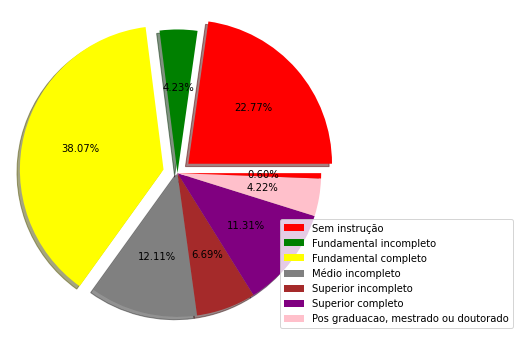

In [14]:
labels = ["Sem instrução","Fundamental incompleto","Fundamental completo","Médio incompleto",
          "Superior incompleto","Superior completo","Pos graduacao, mestrado ou doutorado"]
titulos = list(escolaridade.values())
cores = ['red', 'green', 'yellow', 'grey',"brown","purple","pink"]
explode = (0.1, 0, 0.1, 0, 0, 0,0,0)  # somente explode primeiro pedaco
total = sum(titulos)
plt.pie(titulos, explode=explode, colors=cores, autopct=lambda p: '{:.2f}%'.format(p), shadow=True, startangle=0)

plt.legend(labels, loc='best', bbox_to_anchor=(0.8, 0., 0.5, 0.5))

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.axis('equal') 
plt.show()

<p>No gráfico acima, podemos identificar a distribuição do valor do 
auxílio emergencial dada as caracacterísticas de "escolaridade", de acordo com a descrição do IBGE.</p>

<p>Portanto, aqui podemos identificar varias observacoes possiveis acerca das relacoes do valor total repassado do auxilio
emergencial com as varias perguntas feitas na pesquisa</p>

In [18]:
## Treinando um modelo para determinacao do recebimento ou nao do auxilio

In [ ]:
#Ajustando os dados

In [78]:
# Obsevando os dados com grande numero de valores
# nulos para descartar e evitar
# aumento desnecessario de dimensoes do modelo.

for i in dados.columns:
    print(dados[i].value_counts())
    
# nao printei pois o output
# é realmente bem grande para deixar
# no relatorio.

In [30]:
#selecionando as variaveis com possivel melhor eficacia
#para o modelo

dados_sel = dados[['A005',"A006","A006A","A006B","A007","A007A","A008","A009",
              "C001","C002","C003","C004","C005","C0051","C0052","C0053","C006","C007",
              "C007A","C007B","C007C","D0051"]]

dados_sel.head()

,A005,A006,A006A,A006B,A007,A007A,A008,A009,C001,C002,C003,C004,C005,C0051,C0052,C0053,C006,C007,C007A,C007B,C007C,D0051
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,35.0,1
1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,27.0,1
2,2,1.0,1.0,3.0,1.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2,1.0,1.0,3.0,1.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [32]:
# sao todos dados discretos, portanto aqui faco 
# o get_dummies afim de tornar todas as variaveis em binarias

df = dados_sel.loc[:, dados_sel.columns != 'D0051']
target = dados_sel[['D0051']].values.ravel()
df = pd.get_dummies(df,columns = df.columns)

In [33]:
#separacao dos dados de teste e dados de treino

x_treino, x_teste, y_treino, y_teste = train_test_split(
    df,
    target,
    test_size = 0.3,
    random_state = 0,
    shuffle = True
    )

In [34]:
x_treino.shape

(267006, 162)

In [35]:
# treino do modelo

clf=RandomForestClassifier(n_estimators=200)

clf.fit(x_treino,y_treino)

y_resposta_treino=clf.predict(x_treino)
y_resposta_teste = clf.predict(x_teste)

print ("\nDESEMPENHO DENTRO DA AMOSTRA DE TREINO\n")

total   = len(y_treino)
acertos = sum(y_resposta_treino == y_treino)
erros   = sum(y_resposta_treino != y_treino)

print ("Total de amostras: " , total)
print ("Respostas corretas:" , acertos)
print ("Respostas erradas: " , erros)

acuracia = acertos / total

print ("Acuracia = %.1f %%" % (100*acuracia))


print ("\nDESEMPENHO FORA DA AMOSTRA DE TREINO\n")

total   = len(y_teste)
acertos = sum(y_resposta_teste == y_teste)
erros   = sum(y_resposta_teste != y_teste)

print ("Total de amostras: " , total)
print ("Respostas corretas:" , acertos)
print ("Respostas erradas: " , erros)

acuracia = acertos / total

print ("Acuracia = %.1f %%" % (100*acuracia))


DESEMPENHO DENTRO DA AMOSTRA DE TREINO

Total de amostras:  267006
Respostas corretas: 175344
Respostas erradas:  91662
Acuracia = 65.7 %

DESEMPENHO FORA DA AMOSTRA DE TREINO

Total de amostras:  114432
Respostas corretas: 72450
Respostas erradas:  41982
Acuracia = 63.3 %


In [65]:
# retornar a importancia numerica no modelo
importances = list(clf.feature_importances_)

# lista de tuplas com a variavel e sua importancia
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df.columns, importances)]

# ordenar com os mais importantes primeiro
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
counter = 0
for pair in feature_importances:
    if counter == 10:
        break
    print('Variavel: {:20} Importancia para o modelo: {}'.format(*pair))
    counter += 1

Variavel: A005_7               Importancia para o modelo: 0.09
Variavel: C007B_1.0            Importancia para o modelo: 0.08
Variavel: A006_2.0             Importancia para o modelo: 0.05
Variavel: C007B_0.0            Importancia para o modelo: 0.05
Variavel: A005_8               Importancia para o modelo: 0.04
Variavel: A006_0.0             Importancia para o modelo: 0.04
Variavel: A006A_1.0            Importancia para o modelo: 0.04
Variavel: A005_2               Importancia para o modelo: 0.03
Variavel: A006A_2.0            Importancia para o modelo: 0.03
Variavel: C007A_0.0            Importancia para o modelo: 0.03


In [ ]:
# observamos acima a distribuicao da relevancia das variaveis escolhidas

<p>
    Por se tratar de um dataset bem extenso, é demandado um poder computacional consideravel pra fazer alguns testes,
como por exemplo o de validação cruzada e a determinaçao dos hiperparametros 
da arvore de decisões. </p>

<p>
Nesse ponto, tornou-se inviável dada a demora pra realizar essas funcoes.
</p><p>
Portanto, o ajuste do modelo se deu mais pela tentativa de otimizacao das variaveis,
buscando escolher as de maior significancia e que ao mesmo tempo nao aumentavam 
muito o numero de dimensoes do modelo.</p>